In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import warnings

warnings.filterwarnings('ignore') # Suppress warnings for cleaner output


In [51]:
df = pd.read_csv('/kaggle/input/mental-health/mental_health_dataset.csv')

In [52]:
df.head()


,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

In [54]:
df.describe()

,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.557600,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,13.749581,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,18.000000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,30.000000,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,41.500000,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,53.000000,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,65.000000,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


In [55]:
df.describe(include=['object', 'category'])

,gender,employment_status,work_environment,mental_health_history,seeks_treatment,mental_health_risk
count,10000,10000,10000,10000,10000,10000
unique,4,4,3,2,2,3
top,Male,Employed,On-site,No,No,Medium
freq,4557,5868,5044,6969,6012,5892


In [56]:
missing_values = df.isnull().sum()
missing_values

age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64

In [57]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col}: {df[col].nunique()} unique values (Top 5: {unique_vals[:5]})")
target_variable = 'mental_health_risk'

age: 48 unique values (Top 5: [56 46 32 60 25])
gender: 4 unique values (Top 5: ['Male' 'Female' 'Non-binary' 'Prefer not to say'])
employment_status: 4 unique values (Top 5: ['Employed' 'Student' 'Self-employed' 'Unemployed'])
work_environment: 3 unique values (Top 5: ['On-site' 'Remote' 'Hybrid'])
mental_health_history: 2 unique values (Top 5: ['Yes' 'No'])
seeks_treatment: 2 unique values (Top 5: ['Yes' 'No'])
stress_level: 10 unique values (Top 5: [ 6 10  7  4  3])
sleep_hours: 71 unique values (Top 5: [6.2 9.  7.7 4.5 5.4])
physical_activity_days: 8 unique values (Top 5: [3 4 2 0 1])
depression_score: 31 unique values (Top 5: [28 30 24  6 17])
anxiety_score: 22 unique values (Top 5: [17 11  7  0 12])
social_support_score: 101 unique values (Top 5: [54 85 62 95 70])
productivity_score: 546 unique values (Top 5: [59.7 54.9 61.3 97.  69. ])
mental_health_risk: 3 unique values (Top 5: ['High' 'Medium' 'Low'])


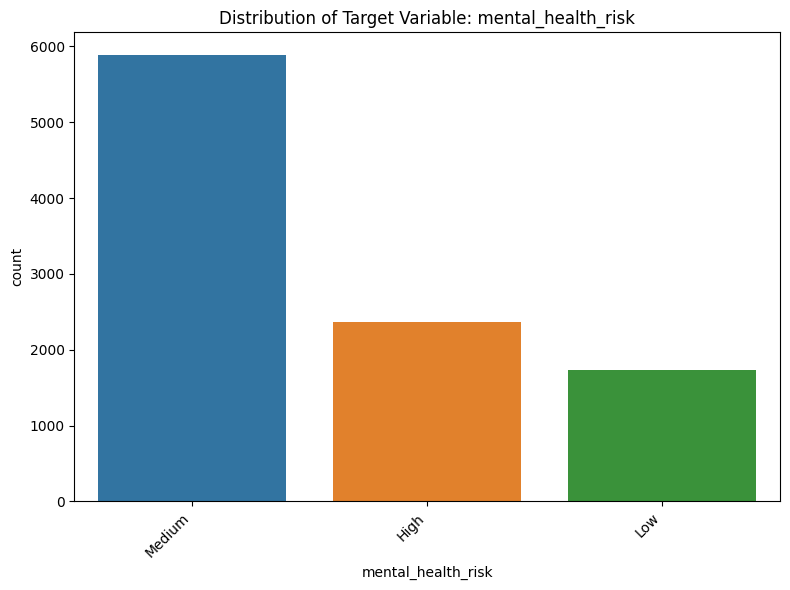

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=df, order=df[target_variable].value_counts().index)
plt.title(f'Distribution of Target Variable: {target_variable}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [59]:
X_features_df = df.drop(target_variable, axis=1, errors='ignore')

numerical_features = X_features_df.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_features_df.select_dtypes(include=['object', 'category']).columns.tolist()


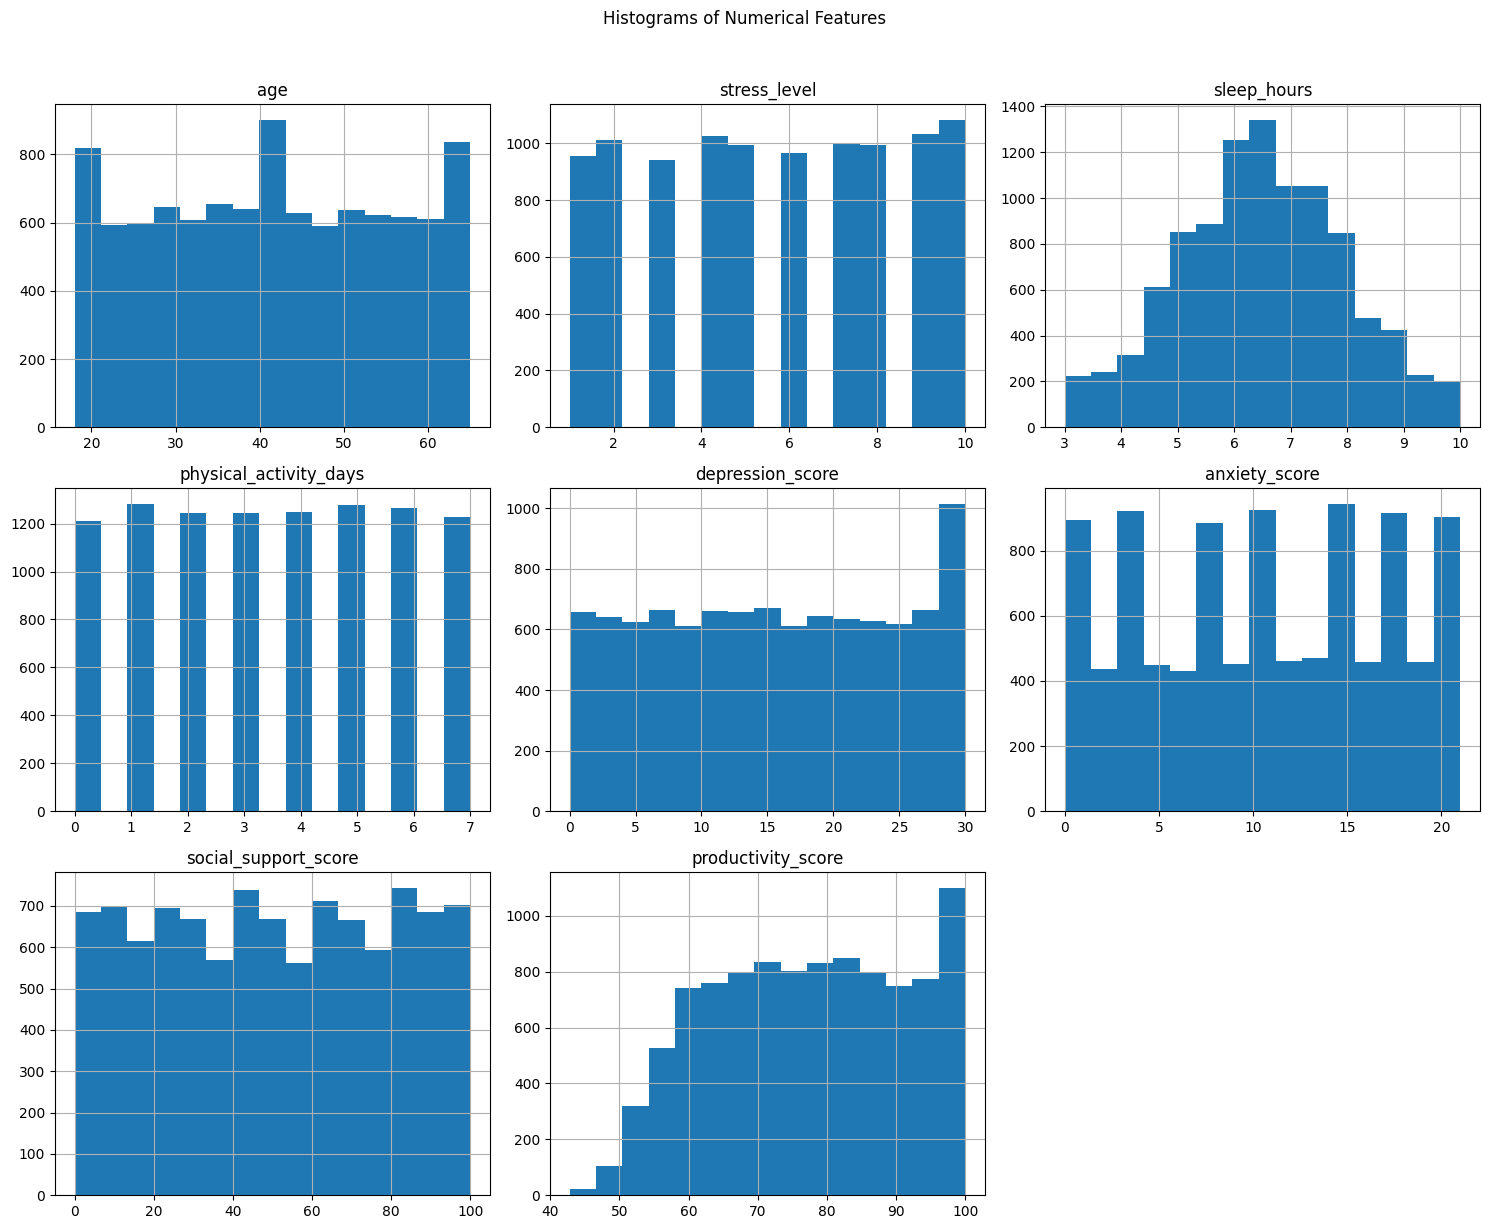

In [60]:
df[numerical_features].hist(bins=15, figsize=(15, max(10, len(numerical_features) * 1.5)), layout=(-1, 3))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()




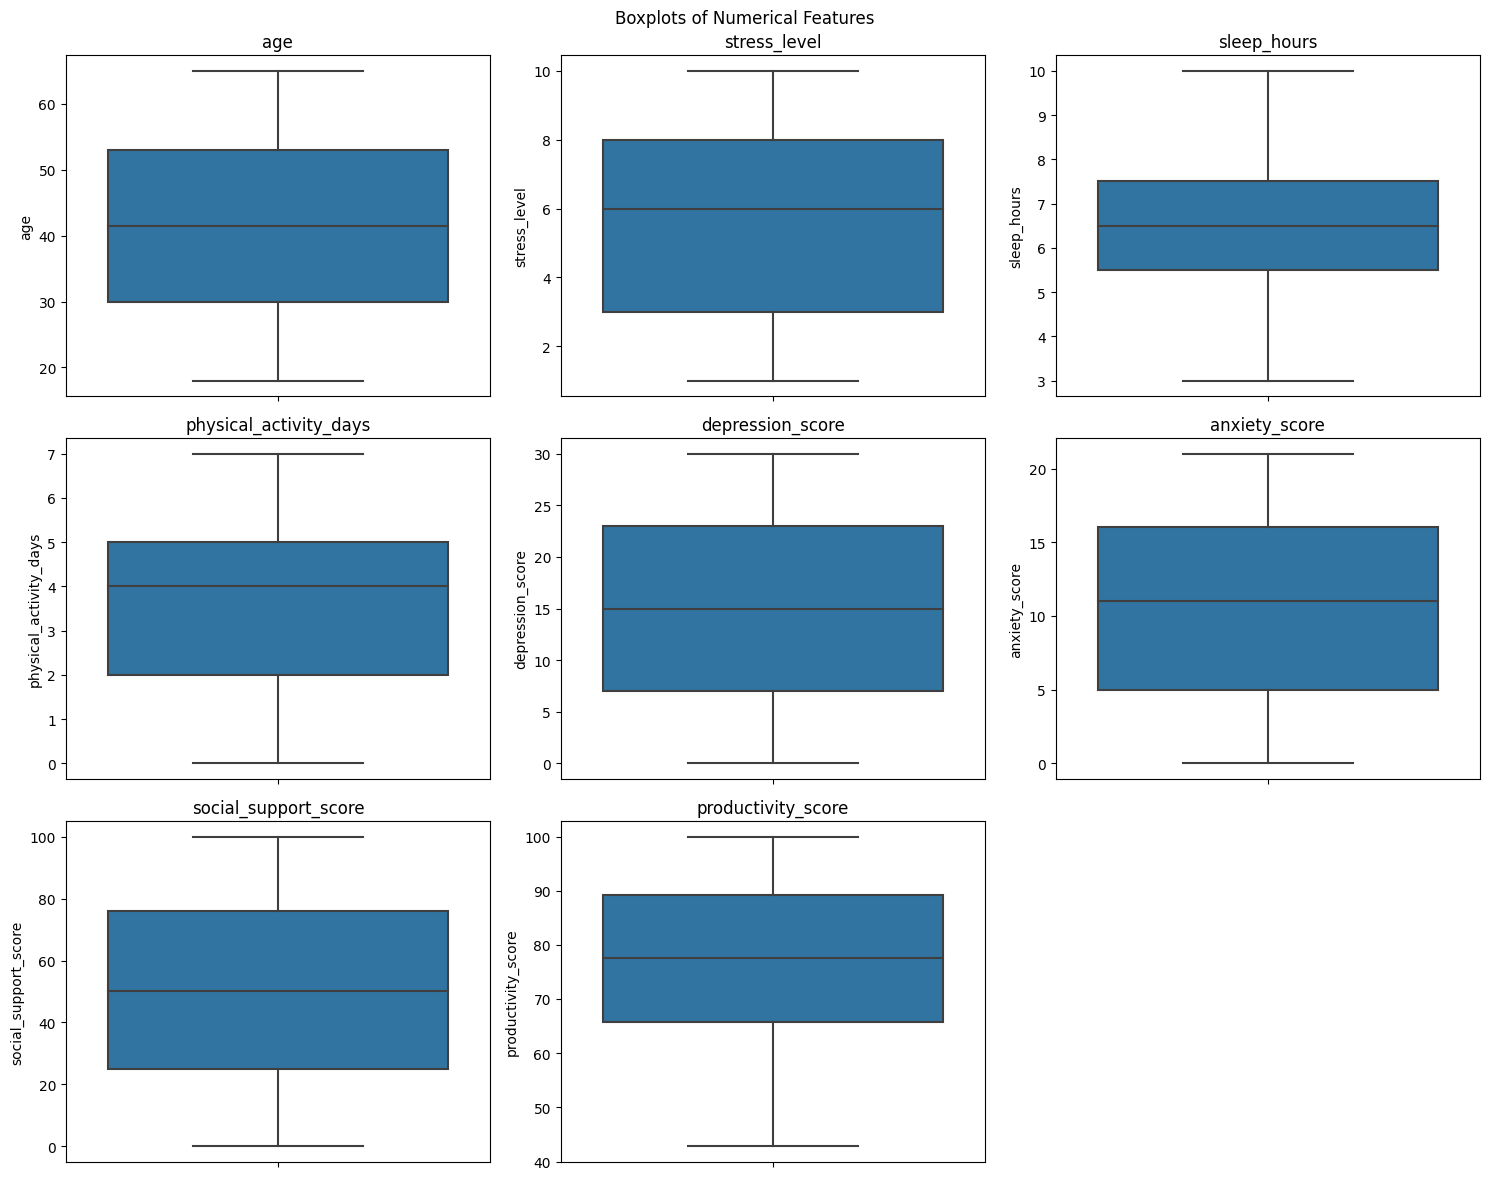

In [61]:
# Boxplots of Numerical Features

    
plt.figure(figsize=(15, max(5, len(numerical_features) * 1.5)))
   
for i, col in enumerate(numerical_features):
   
    plt.subplot((len(numerical_features) + 2) // 3, 3, i + 1)
   
    sns.boxplot(y=df[col])
    
    plt.title(col)
  
    
plt.suptitle('Boxplots of Numerical Features')
plt.tight_layout()
   
plt.show()


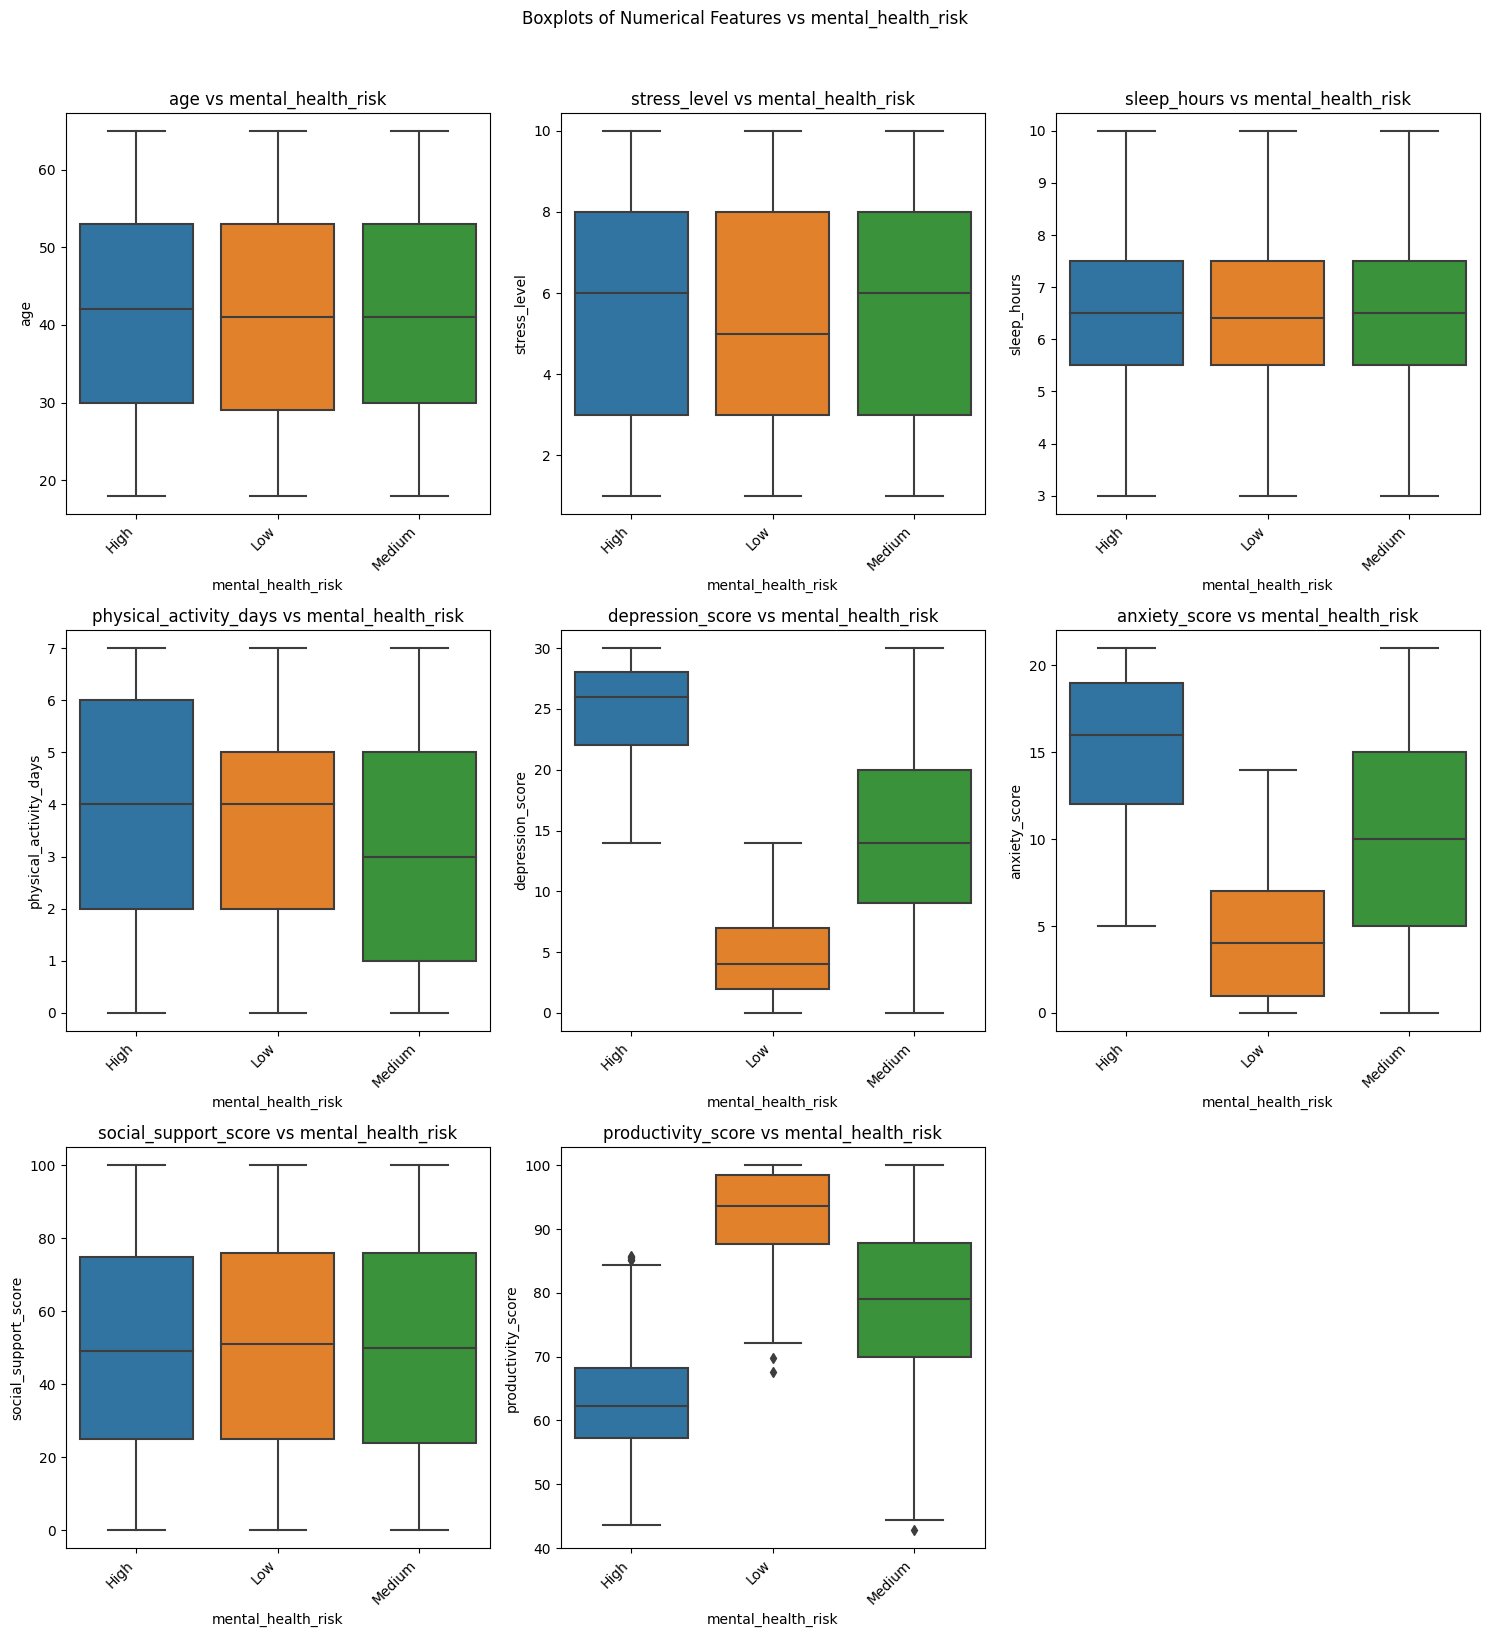

In [62]:
plt.figure(figsize=(15, max(6, len(numerical_features) * 2)))

for i, col in enumerate(numerical_features):
    plt.subplot((len(numerical_features) + 2) // 3, 3, i + 1)
    
    sns.boxplot(x=df[target_variable], y=df[col], order=sorted(df[target_variable].unique().tolist()))
    
    plt.title(f'{col} vs {target_variable}')
    plt.xticks(rotation=45, ha='right')

plt.suptitle(f'Boxplots of Numerical Features vs {target_variable}', y=1.02)
plt.tight_layout()  # Adjust layout to fit suptitle
plt.show()

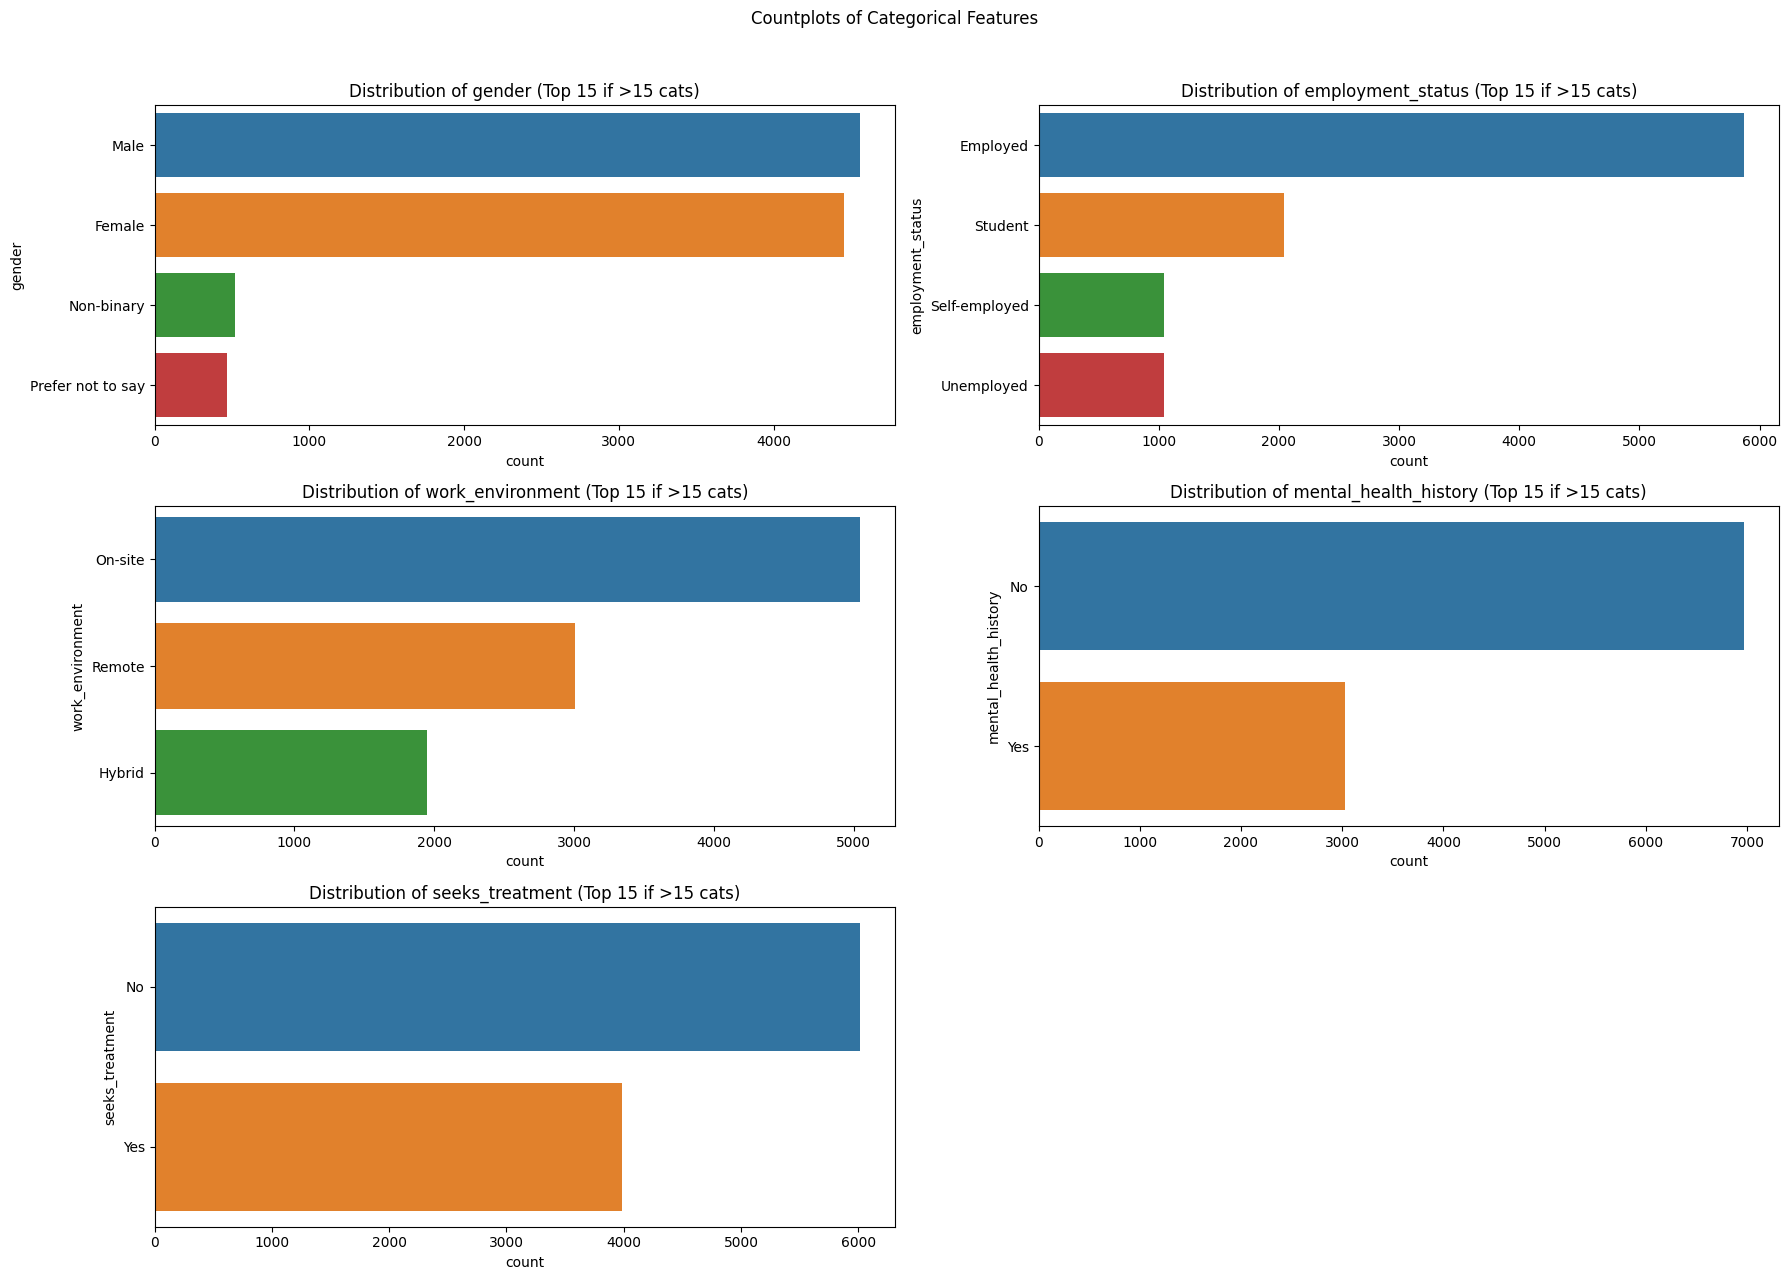

In [63]:
plt.figure(figsize=(18, max(6, len(categorical_features) * 2.5)))

for i, col in enumerate(categorical_features):
    plt.subplot((len(categorical_features) + 1) // 2, 2, i + 1)
    
    # Show top 15 categories for readability
    order = df[col].value_counts().index[:15] if df[col].nunique() > 15 else df[col].value_counts().index
    sns.countplot(y=df[col], order=order)
    
    plt.title(f'Distribution of {col} (Top 15 if >15 cats)')

plt.suptitle('Countplots of Categorical Features', y=1.02)
plt.tight_layout()
plt.show()

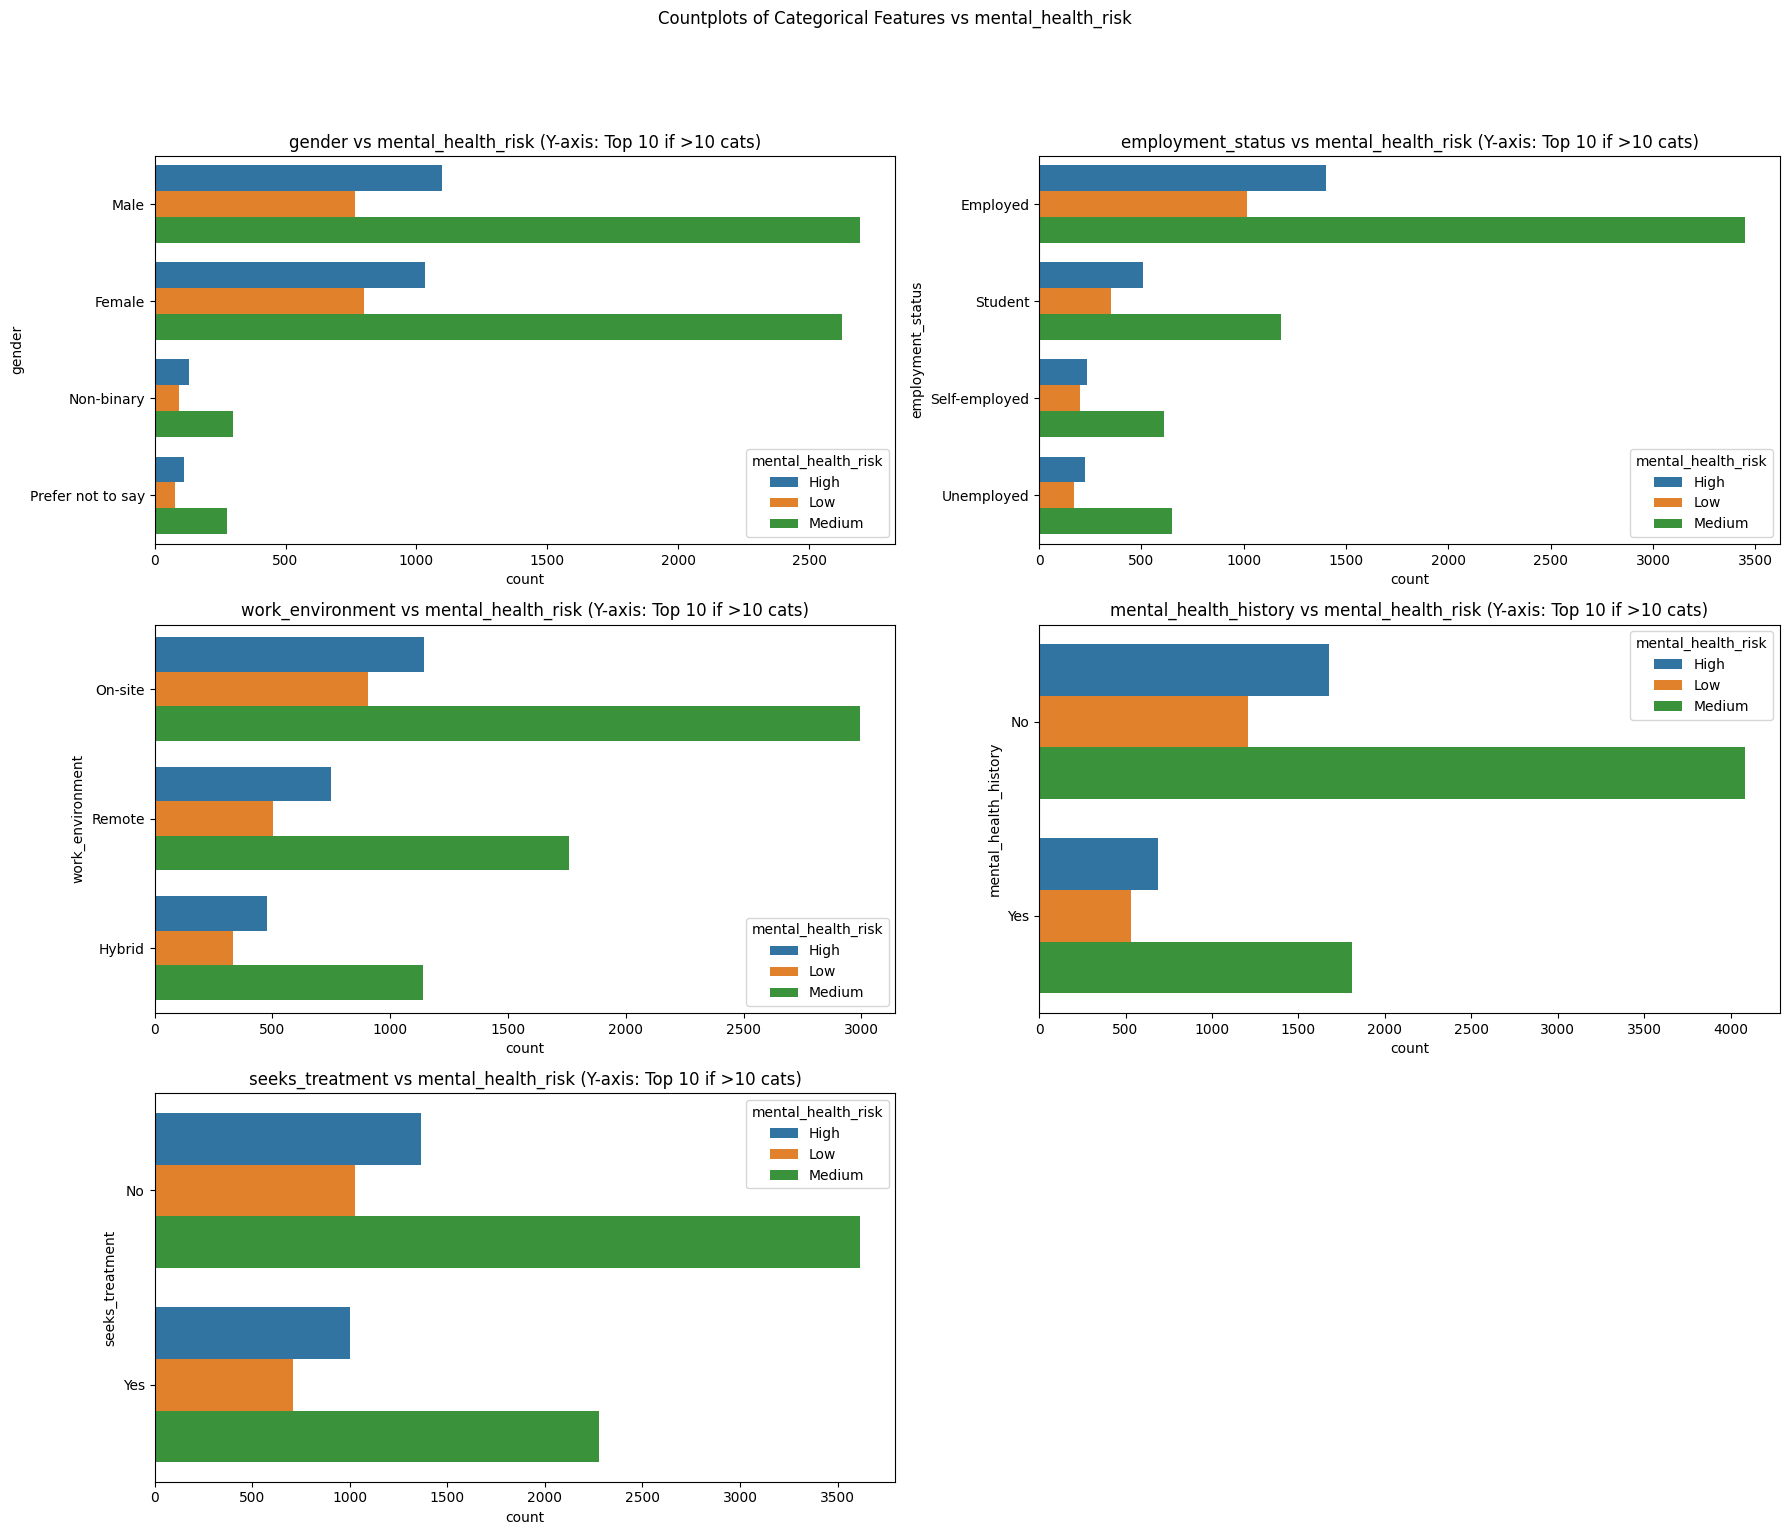

In [64]:
plt.figure(figsize=(18, max(7, len(categorical_features) * 3)))

for i, col in enumerate(categorical_features):
    plt.subplot((len(categorical_features) + 1) // 2, 2, i + 1)
    
    y_order = df[col].value_counts().index[:10] if df[col].nunique() > 10 else df[col].value_counts().index
    hue_order = sorted(df[target_variable].unique().tolist())
    
    sns.countplot(y=df[col], hue=df[target_variable], order=y_order, hue_order=hue_order)
    plt.title(f'{col} vs {target_variable} (Y-axis: Top 10 if >10 cats)')

plt.suptitle(f'Countplots of Categorical Features vs {target_variable}', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

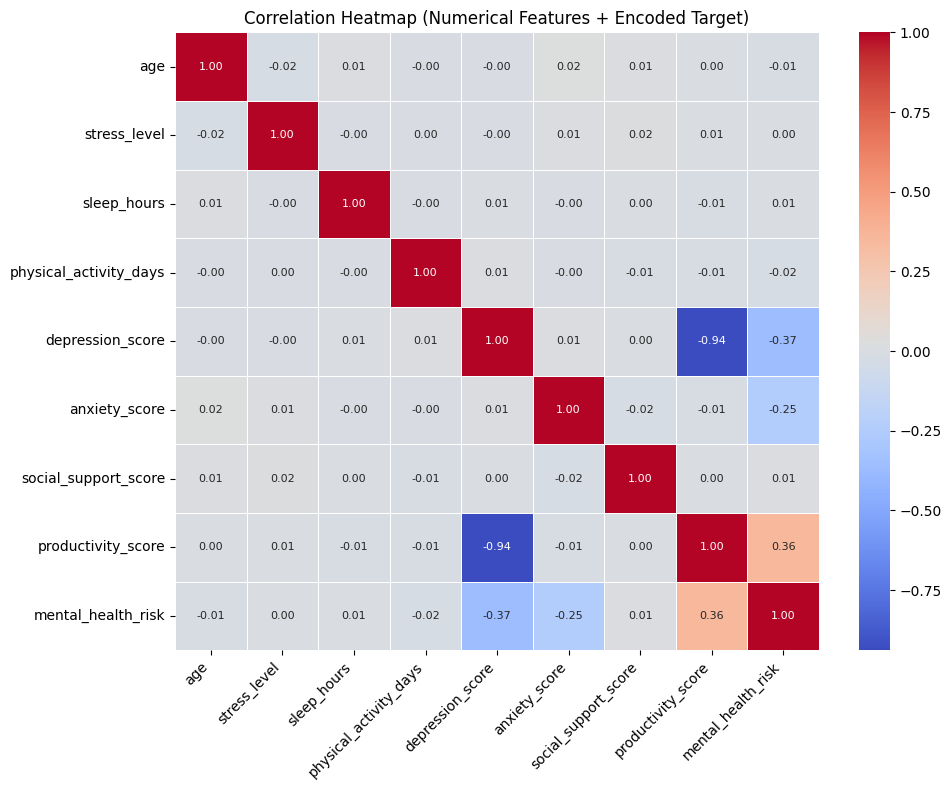

In [65]:
plt.figure(figsize=(max(10, len(numerical_features) * 0.8), max(8, len(numerical_features) * 0.6)))

temp_df_for_corr = df[numerical_features].copy()

le_corr = LabelEncoder()
if df[target_variable].dtype == 'object' or pd.api.types.is_categorical_dtype(df[target_variable]):
    temp_df_for_corr[target_variable] = le_corr.fit_transform(df[target_variable])
else:
    temp_df_for_corr[target_variable] = df[target_variable]

correlation_matrix = temp_df_for_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap (Numerical Features + Encoded Target)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Data Preprocessing


In [66]:
df_processed = df.copy()

for col in numerical_features:
    median_val = df_processed[col].median()
    df_processed[col].fillna(median_val, inplace=True)

for col in categorical_features:
    mode_val = df_processed[col].mode()[0]
    df_processed[col].fillna(mode_val, inplace=True)

df_processed.dropna(subset=[target_variable], inplace=True)


In [67]:
y_series = df_processed[target_variable]
le_target = LabelEncoder()
y = le_target.fit_transform(y_series)


In [68]:
X = df_processed[numerical_features + categorical_features]


In [69]:
high_cardinality_threshold = 15
high_cardinality_cols = [col for col in categorical_features if X[col].nunique() > high_cardinality_threshold]


In [70]:
final_numerical_features = [col for col in numerical_features if col in X.columns]
final_categorical_features = [col for col in categorical_features if col in X.columns]

transformers_list = []


transformers_list.append(('num', StandardScaler(), final_numerical_features))


transformers_list.append(('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), final_categorical_features))

preprocessor = ColumnTransformer(
    transformers=transformers_list,
    remainder='passthrough'
)


# Train-Test Split


In [71]:
value_counts_y = pd.Series(y).value_counts()
   
stratify_option = y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=stratify_option)


# Define models


In [72]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', class_weight='balanced' if stratify_option is not None else None),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced' if stratify_option is not None else None),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100)
}


# Train and evaluate models



Logistic Regression Performance:
Training Accuracy: 0.9815
Test Accuracy: 0.9812

Classification Report (Test Set):
              precision    recall  f1-score   support

        High       0.95      1.00      0.97       592
         Low       0.97      1.00      0.98       435
      Medium       1.00      0.97      0.98      1473

    accuracy                           0.98      2500
   macro avg       0.97      0.99      0.98      2500
weighted avg       0.98      0.98      0.98      2500


Confusion Matrix (Test Set):


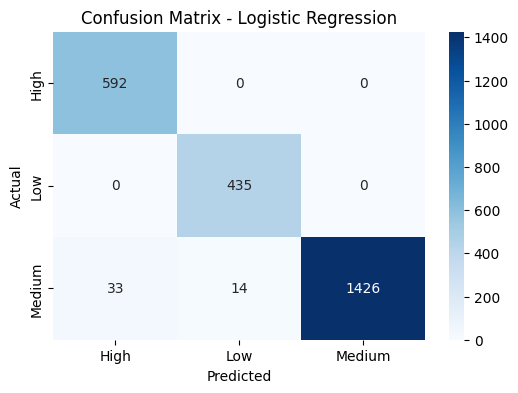


Random Forest Performance:
Training Accuracy: 1.0000
Test Accuracy: 0.9784

Classification Report (Test Set):
              precision    recall  f1-score   support

        High       0.98      0.96      0.97       592
         Low       0.98      0.97      0.97       435
      Medium       0.98      0.99      0.98      1473

    accuracy                           0.98      2500
   macro avg       0.98      0.97      0.98      2500
weighted avg       0.98      0.98      0.98      2500


Confusion Matrix (Test Set):


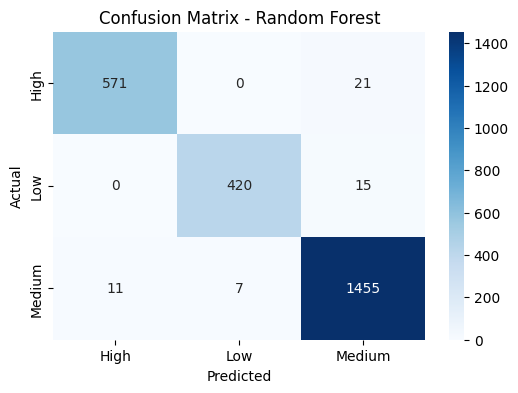


Gradient Boosting Performance:
Training Accuracy: 0.9996
Test Accuracy: 0.9980

Classification Report (Test Set):
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       592
         Low       1.00      0.99      1.00       435
      Medium       1.00      1.00      1.00      1473

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500


Confusion Matrix (Test Set):


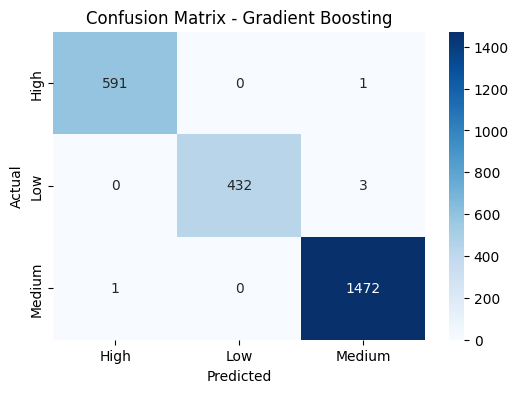

In [73]:
results = {}
trained_pipelines = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    trained_pipelines[model_name] = pipeline

    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f"\n{model_name} Performance:")
    print(f"Training Accuracy: {accuracy_train:.4f}")
    print(f"Test Accuracy: {accuracy_test:.4f}")

    print("\nClassification Report (Test Set):")
    class_names = le_target.classes_ if 'le_target' in locals() else None
    print(classification_report(y_test, y_pred_test, target_names=class_names, zero_division=0))

    print("\nConfusion Matrix (Test Set):")
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(max(6, len(le_target.classes_)*1.5), max(4, len(le_target.classes_)*1)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names if class_names is not None else 'auto', 
                yticklabels=class_names if class_names is not None else 'auto')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    


In [74]:
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr')

results[model_name] = {
    'Training Accuracy': accuracy_train,
    'Test Accuracy': accuracy_test,
    'Classification Report': classification_report(y_test, y_pred_test, target_names=class_names, output_dict=True, zero_division=0),
    'Confusion Matrix': cm,
    'ROC AUC': roc_auc
}


# Model Comparison


In [75]:
valid_results_items = [item for item in results.items() if 'Error' not in item[1] and 'Test Accuracy' in item[1]]
sorted_results = sorted(valid_results_items, key=lambda item: item[1].get('Test Accuracy', 0), reverse=True)

for model_name, metrics in sorted_results:
    roc_auc_val = metrics.get('ROC AUC', 'N/A')
    roc_auc_str = f"{roc_auc_val:.4f}" if isinstance(roc_auc_val, float) else str(roc_auc_val)
    print(f"{model_name}: Test Accuracy = {metrics.get('Test Accuracy', 0):.4f}, ROC AUC = {roc_auc_str}")


Gradient Boosting: Test Accuracy = 0.9980, ROC AUC = 1.0000


In [76]:
best_model_name = None
best_model_name = sorted_results[0][0]
best_accuracy = sorted_results[0][1].get('Test Accuracy', 0)
print(f"\nBest model based on Test Accuracy: {best_model_name} with accuracy {best_accuracy:.4f}")


Best model based on Test Accuracy: Gradient Boosting with accuracy 0.9980
